In [3]:
import sys
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from firesong.Firesong import firesong_simulation
%matplotlib ipympl

sys.path.append('/home/xingwei/repo/GammaSource/LHAASO_PSF/PSFConv/')
import Plot
import PSF

In [2]:
simuinfo = firesong_simulation(None,
                          filename=None,
                          density=1e-9,
                          Evolution='MD2014SFR',
                          Transient=False,
                          LF='LG')

##############################################################################
##### FIRESONG initializing  - Calculating Neutrino CDFs #####
Lognormal distributed sources
Source evolution assumed: MD2014SFR
Local density of neutrino sources: 1e-09/Mpc^3
Total number of neutrinos sources in the Universe: 13295
Redshift range: 0 - 10.0
Standard Candle Luminosity: 7.9000e+52 erg/yr
##### FIRESONG initialization done #####

Actual diffuse flux simulated :
E^2 dNdE = 9.177260048233969e-09 (E/100 TeV)^(-0.2799999999999998) [GeV/cm^2.s.sr]


In [3]:
srcs = simuinfo['sources']
NSIDE = 2048
allsky = Plot.allskymap(RA=srcs['ra'],DEC=srcs['dec'],FLUX=(srcs['flux']),NSIDE=NSIDE,Plot=False)
galabkg = np.load('Fermi-LAT_pi0_map.npy')
galabkg = hp.ud_grade(galabkg,NSIDE)
allsky_bkg = allsky + galabkg


In [4]:
hp.mollview(np.log10(galabkg))
Plot.plotGala()
hp.graticule(dpar = 10,dmer=10)
radius = 10
xsize = 200
x = np.linspace(-radius,radius,xsize)
y = np.linspace(-radius,radius,xsize)
roi = Plot.selectreg(np.log10(galabkg),77,5,10,NSIDE,xsize=xsize)
plt.close('all')
psfconv= PSF.fitpsf(0,plot=False)
roi_blur = psfconv(roi,x,y)

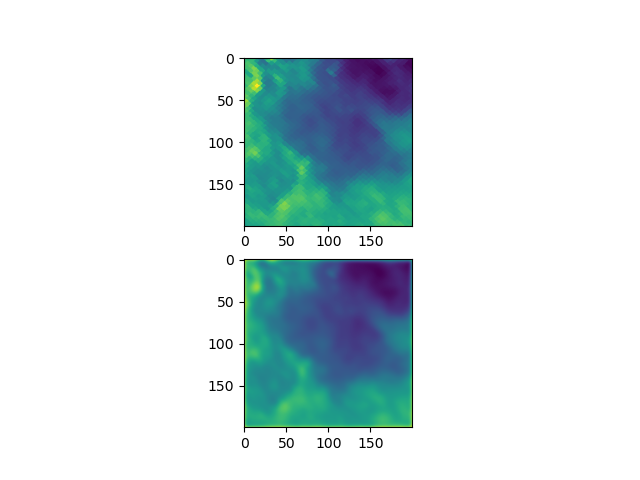

In [5]:
fig,ax = plt.subplots(2)
ax[0].imshow(roi)
ax[1].imshow(roi_blur)

In [6]:
x = np.arange(10)
y = np.arange(20)
xx,yy = np.meshgrid(x,y)
xx.shape

(20, 10)

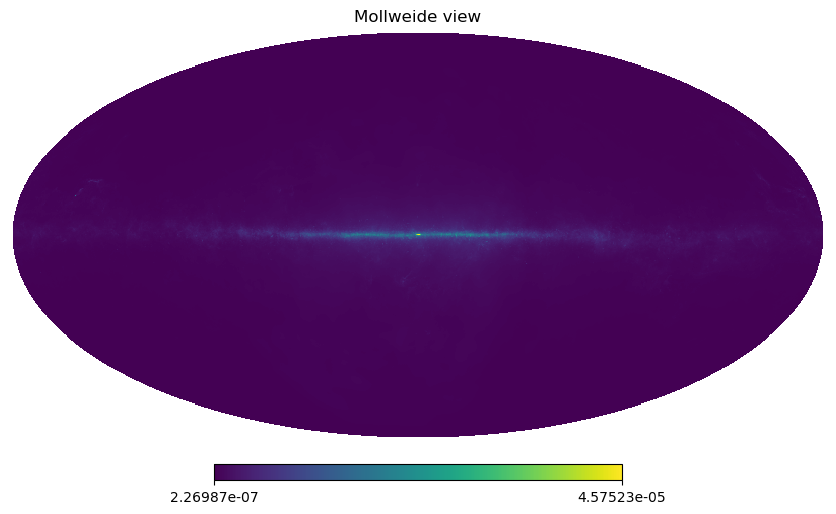

In [1]:
import healpy as hp
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import sys
import scipy
sys.path.append('/home/xingwei/repo/GammaSource/LHAASO_PSF/PSFConv/')
import Plot
import PSF
hdulist = fits.open('gll_iem_v07.fits')
bkgdata = hdulist[0].data[0,:,:]


sky = Plot.img2healpix(512,1024,bkgdata)
hp.mollview(sky,rot=(180,0))

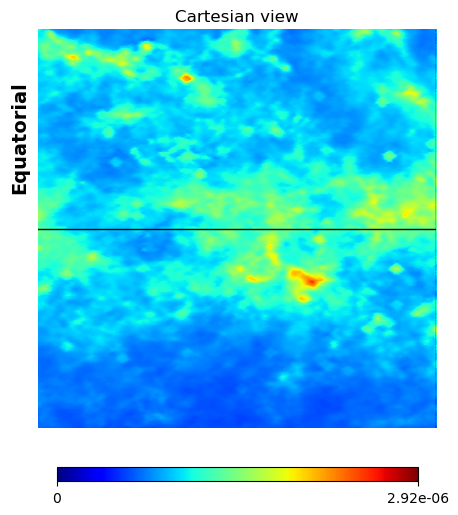

In [3]:

ra = 10
dec = 0
radius = 10
NS = 2048
roi = Plot.selectreg_interp(sky,ra,dec,radius,NS,plot= True)




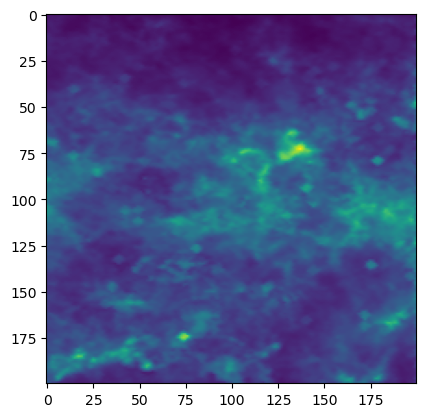

In [19]:
plt.imshow(roi)

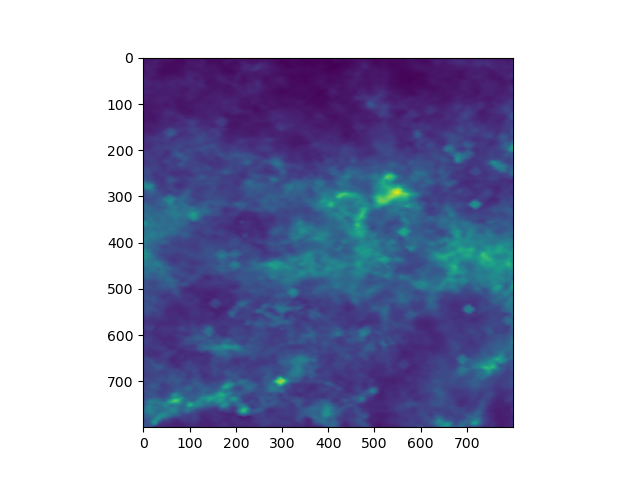